<a href="https://colab.research.google.com/github/NeoRedcraft/dl-project-1/blob/Jeffery_branch/jupyter_notebook/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Introduction to the Problem

hello world

# Section 2: Dataset Description

[Provide a brief description of the dataset]





## Section 2.1 : Source of the dataset
[State the source of the dataset and how it was collected.]

In [ ]:
import os
import zipfile

# Clone the GitHub repository where the dataset is stored
!git clone https://github.com/NeoRedcraft/dl-project-1

# Define the path to the cloned repository
repo_path = 'dl-project-1' # This should match the directory name from cloning

# Define the path to the raw data directory within the repository
raw_data_path = os.path.join(repo_path, 'data/raw')

# List of zip files to extract
zip_files_to_extract = [
    'Age_Related_Macular_Degeneration.zip',
    'Hypertensive_Retinopathy.zip',
    'Normal_Fundus.zip',
    'Pathological_Myopia.zip'
]

# Define the directory where you want to extract the contents
extract_dir_base = os.path.join(repo_path, 'extracted_data') # Base directory for extraction

# Iterate through each zip file and extract it
for zip_file_name in zip_files_to_extract:
    zip_file_path = os.path.join(raw_data_path, zip_file_name)
    # Create a dedicated extraction directory for each zip file
    extract_dir = os.path.join(extract_dir_base, os.path.splitext(zip_file_name)[0])

    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_dir, exist_ok=True)

    # Unzip the file
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted {zip_file_name} to: {extract_dir}")
    except FileNotFoundError:
        print(f"Error: Zip file not found at {zip_file_path}")
    except zipfile.BadZipFile:
        print(f"Error: Could not open or read the zip file at {zip_file_path}. It might be corrupted.")
    except Exception as e:
        print(f"An error occurred during extraction {zip_file_name}: {e}")



Cloning into 'dl-project-1'...
remote: Enumerating objects: 5825, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 5825 (delta 16), reused 19 (delta 3), pack-reused 5780 (from 2)
Receiving objects: 100% (5825/5825), 215.66 MiB | 35.87 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (5769/5769), done.
Filtering content: 100% (4/4), 1.57 GiB | 32.19 MiB/s, done.
Successfully extracted Age_Related_Macular_Degeneration.zip to: dl-project-1/extracted_data/Age_Related_Macular_Degeneration
Successfully extracted Hypertensive_Retinopathy.zip to: dl-project-1/extracted_data/Hypertensive_Retinopathy
Successfully extracted Normal_Fundus.zip to: dl-project-1/extracted_data/Normal_Fundus
Successfully extracted Pathological_Myopia.zip to: dl-project-1/extracted_data/Pathological_Myopia


## Section 2.2: Dataset Structure
[Explain the dataset structure (number of images, labels, categories)]

Count for 'Age_Related_Macular_Degeneration': 7412
Count for 'Hypertensive_Retinopathy': 6224
Count for 'Normal_Fundus': 13438
Count for 'Pathological_Myopia': 5833


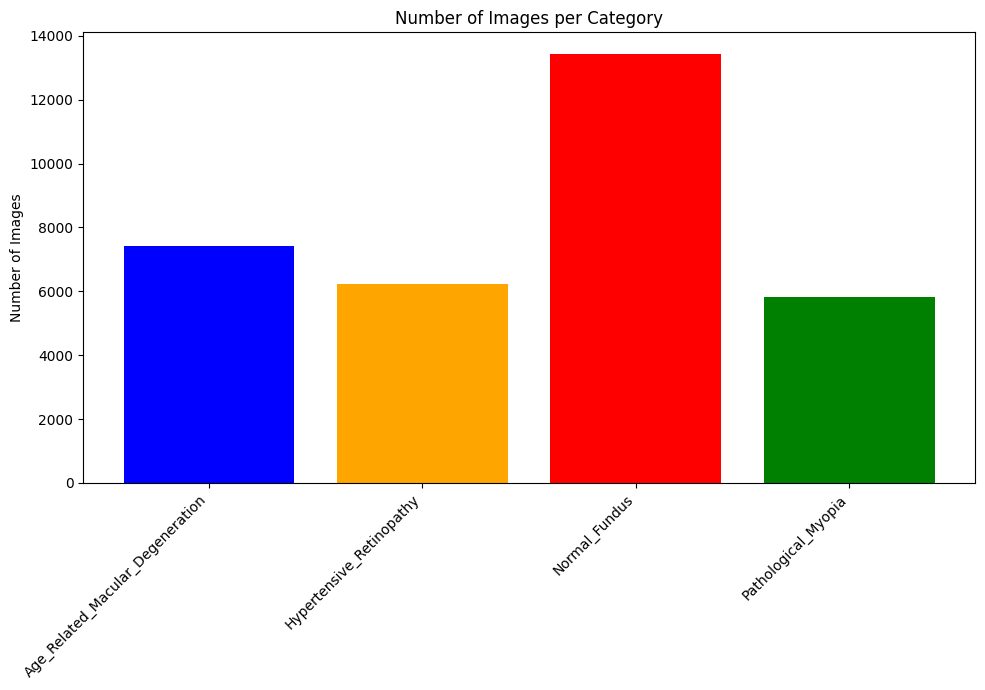

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the base directory where the zip files were extracted
extract_dir_base = 'dl-project-1/extracted_data' # This should match the extraction directory from the previous step

# List of the extracted directories (corresponding to the original zip files)
extracted_folders = [
    'Age_Related_Macular_Degeneration',
    'Hypertensive_Retinopathy',
    'Normal_Fundus',
    'Pathological_Myopia'
]

# Dictionary to store the count of files in each folder
folder_counts = {}

# Iterate through each extracted folder and count the files
for folder_name in extracted_folders:
    # Construct the path to the nested folder
    nested_folder_path = os.path.join(extract_dir_base, folder_name, folder_name) # Assuming the nested folder has the same name

    if os.path.exists(nested_folder_path):
        # Count files (excluding directories) in the nested folder
        file_count = len([f for f in os.listdir(nested_folder_path) if os.path.isfile(os.path.join(nested_folder_path, f))])
        folder_counts[folder_name] = file_count
        print(f"Count for '{folder_name}': {file_count}")
    else:
        print(f"Warning: Nested folder not found at {nested_folder_path}")
        folder_counts[folder_name] = 0 # Add with 0 count if folder not found


# Prepare data for the bar graph
labels = list(folder_counts.keys())
counts = list(folder_counts.values())

# Create a bar graph
plt.figure(figsize=(10, 7))
plt.bar(labels, counts, color=['blue', 'orange', 'red', 'green'])
plt.ylabel('Number of Images')
plt.title('Number of Images per Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

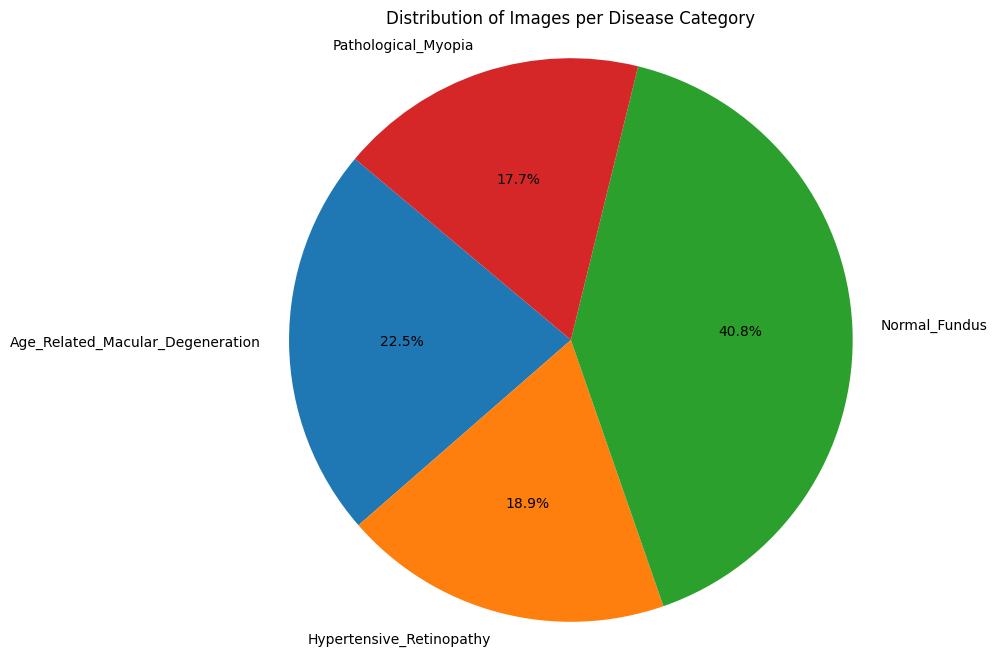

Number of images per disease category:
Age_Related_Macular_Degeneration: 7412
Hypertensive_Retinopathy: 6224
Normal_Fundus: 13438
Pathological_Myopia: 5833


In [ ]:
# Prepare data for the pie chart
pie_labels = list(folder_counts.keys())
pie_sizes = list(folder_counts.values())

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images per Disease Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# You can also print the counts for clarity
print("Number of images per disease category:")
for label, count in zip(pie_labels, pie_sizes):
    print(f"{label}: {count}")

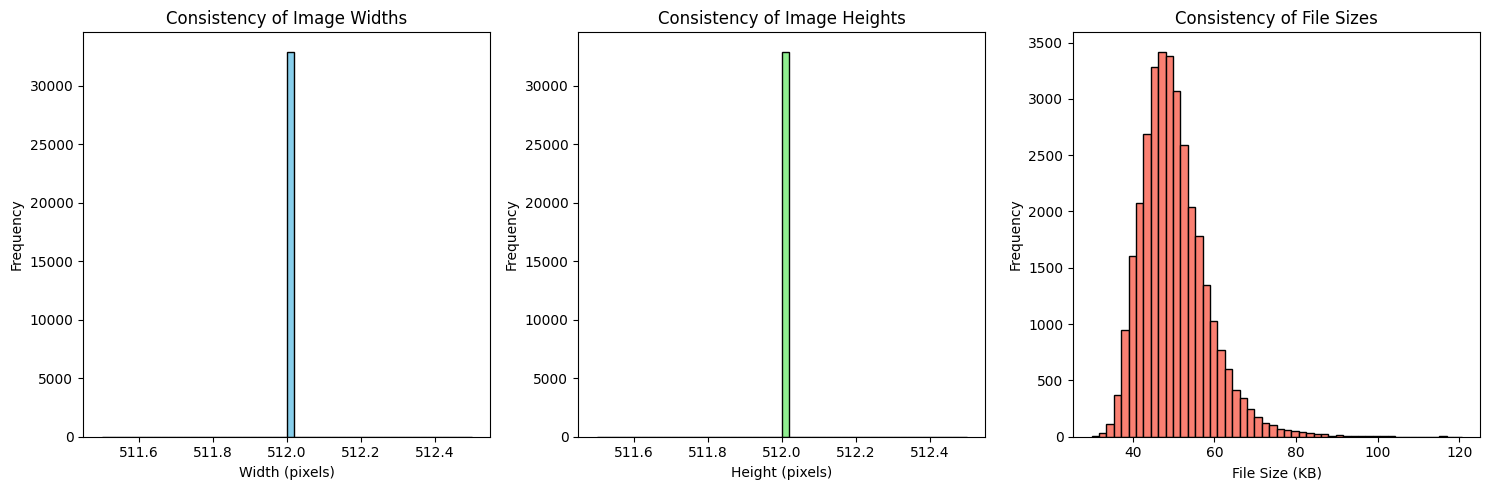

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store image attributes
resolutions = []
file_sizes = []

# Iterate through each extracted folder and collect attributes from images within the nested folder
for folder_name in extracted_folders:
    nested_folder_path = os.path.join(extract_dir_base, folder_name, folder_name) # Assuming the nested folder structure

    if os.path.exists(nested_folder_path):
        for filename in os.listdir(nested_folder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                filepath = os.path.join(nested_folder_path, filename)

                # Get file size
                file_size_kb = os.path.getsize(filepath) / 1024  # in KB
                file_sizes.append(file_size_kb)

                try:
                    # Open image to get resolution
                    with Image.open(filepath) as img:
                        width, height = img.size
                        resolutions.append((width, height))
                except Exception as e:
                    print(f"Could not process image {filepath}: {e}")
    else:
        print(f"Warning: Nested folder not found for {folder_name} at {nested_folder_path}")


# Prepare data for histograms
widths = [res[0] for res in resolutions]
heights = [res[1] for res in resolutions]

# Create histograms
plt.figure(figsize=(15, 5))

# Histogram of Image Widths
plt.subplot(1, 3, 1)
plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Widths')

# Histogram of Image Heights
plt.subplot(1, 3, 2)
plt.hist(heights, bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Heights')

# Histogram of File Sizes
plt.subplot(1, 3, 3)
plt.hist(file_sizes, bins=50, color='salmon', edgecolor='black')
plt.xlabel('File Size (KB)')
plt.ylabel('Frequency')
plt.title('Consistency of File Sizes')

plt.tight_layout()
plt.show()

## Section 2.3: Preprocessing Steps
[Discuss any preprocessing steps applied (resizing, augmentation, annotation formats,
etc.)]

/content/dl-project-1/data/dl-project-1.v2i.yolov12


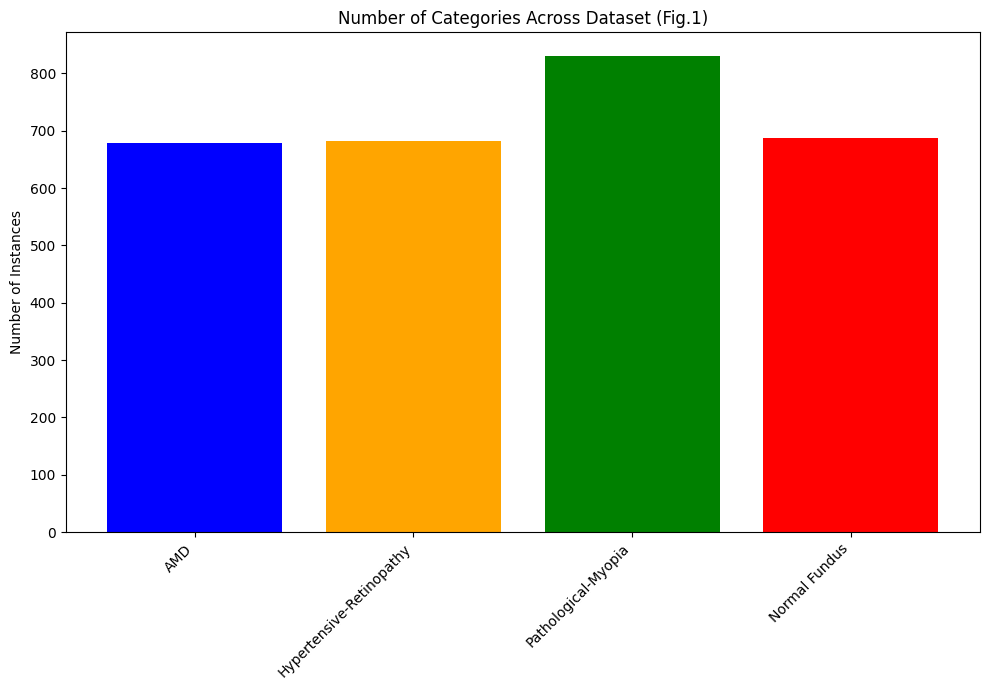

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Change to the directory containing the dataset folders
%cd /content/dl-project-1/data/dl-project-1.v2i.yolov12

# Define the paths to the train, valid, and test image folders
train_images_path = 'train/images'
valid_images_path = 'valid/images'
test_images_path = 'test/images'

# Define the keywords to look for in image filenames for the other classes
amd_keyword = 'AMD'
hypertensive_keyword = 'Hypertensive-Retinopathy'
myopia_keyword = 'Pathological-Myopia'
normal_fundus_name = 'Normal Fundus'
other_class_keywords = [amd_keyword.lower(), hypertensive_keyword.lower(), myopia_keyword.lower()]

# Function to count images for the specific disease classes based on filename keywords
def count_disease_classes_by_filename(image_folder):
    class_counts = defaultdict(int)
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_filename in image_files:
        filename_lower = image_filename.lower()
        if amd_keyword.lower() in filename_lower:
            class_counts[amd_keyword] += 1
        elif hypertensive_keyword.lower() in filename_lower:
            class_counts[hypertensive_keyword] += 1
        elif myopia_keyword.lower() in filename_lower:
            class_counts[myopia_keyword] += 1

    return class_counts

# Function to count Normal Fundus images based on the absence of other class keywords in filename
def count_normal_fundus_by_filename(image_folder):
    normal_fundus_count = 0
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_filename in image_files:
        filename_lower = image_filename.lower()
        is_other_class = False
        for keyword in other_class_keywords:
            if keyword in filename_lower:
                is_other_class = True
                break
        if not is_other_class:
            normal_fundus_count += 1

    return normal_fundus_count


# Count classes in each split based on filenames
train_disease_counts = count_disease_classes_by_filename(train_images_path)
train_normal_fundus_count = count_normal_fundus_by_filename(train_images_path)

valid_disease_counts = count_disease_classes_by_filename(valid_images_path)
valid_normal_fundus_count = count_normal_fundus_by_filename(valid_images_path)

test_disease_counts = count_disease_classes_by_filename(test_images_path)
test_normal_fundus_count = count_normal_fundus_by_filename(test_images_path)


# Combine counts from all splits
total_class_counts = defaultdict(int)
all_class_names = [amd_keyword, hypertensive_keyword, myopia_keyword, normal_fundus_name]

# Sum disease counts
for class_name in [amd_keyword, hypertensive_keyword, myopia_keyword]:
    total_class_counts[class_name] = (
        train_disease_counts[class_name] +
        valid_disease_counts[class_name] +
        test_disease_counts[class_name]
    )

# Sum Normal Fundus counts
total_class_counts[normal_fundus_name] = (
    train_normal_fundus_count +
    valid_normal_fundus_count +
    test_normal_fundus_count
)


# Prepare data for the bar graph
labels = list(total_class_counts.keys())
counts = list(total_class_counts.values())

# Create a bar graph
plt.figure(figsize=(10, 7))
plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Number of Instances')
plt.title('Number of Categories Across Dataset (Fig.1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

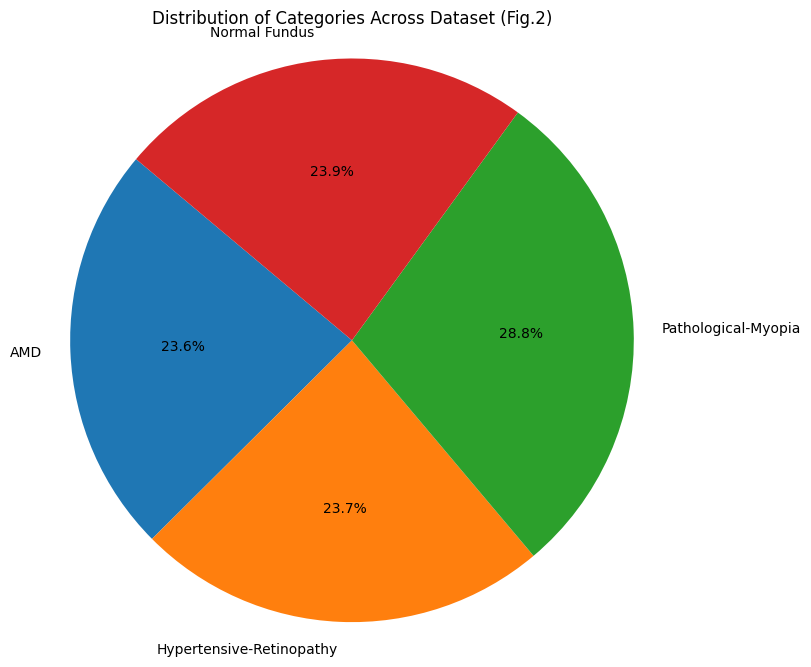

Total number of instances for each class:
AMD: 678
Hypertensive-Retinopathy: 682
Pathological-Myopia: 830
Normal Fundus: 688


In [ ]:
# Prepare data for the pie chart
pie_labels = list(total_class_counts.keys())
pie_sizes = list(total_class_counts.values())

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories Across Dataset (Fig.2)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print total number for each class
print("Total number of instances for each class:")
for label, count in zip(pie_labels, pie_sizes):
    print(f"{label}: {count}")

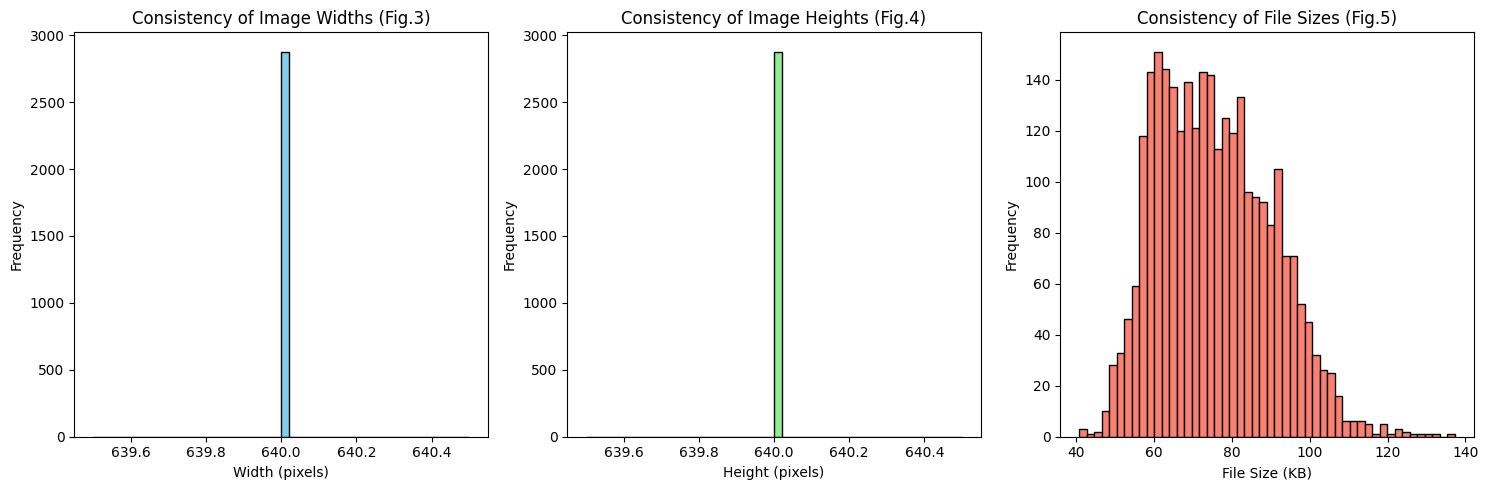

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the paths to the train, valid, and test image folders
train_images_path = 'train/images'
valid_images_path = 'valid/images'
test_images_path = 'test/images'

# List of all image folders
image_folders = [train_images_path, valid_images_path, test_images_path]

# Initialize lists to store image attributes
resolutions = []
file_sizes = []
aspect_ratios = []

# Iterate through each image folder and collect attributes
for folder_path in image_folders:
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(folder_path, filename)

            # Get file size
            file_size_kb = os.path.getsize(filepath) / 1024  # in KB
            file_sizes.append(file_size_kb)

            try:
                # Open image to get resolution and calculate aspect ratio
                with Image.open(filepath) as img:
                    width, height = img.size
                    resolutions.append((width, height))
                    aspect_ratios.append(width / height)
            except Exception as e:
                print(f"Could not process image {filepath}: {e}")


# Prepare data for histograms
widths = [res[0] for res in resolutions]
heights = [res[1] for res in resolutions]

# Create histograms
plt.figure(figsize=(15, 5))

# Histogram of Image Widths
plt.subplot(1, 3, 1)
plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Widths (Fig.3)')

# Histogram of Image Heights
plt.subplot(1, 3, 2)
plt.hist(heights, bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Heights (Fig.4)')

# Histogram of File Sizes
plt.subplot(1, 3, 3)
plt.hist(file_sizes, bins=50, color='salmon', edgecolor='black')
plt.xlabel('File Size (KB)')
plt.ylabel('Frequency')
plt.title('Consistency of File Sizes (Fig.5)')

plt.tight_layout()
plt.show()


# Section 3: Requirements

[insert text]

## Section 3.1: Python Libraries Used

In [ ]:
# Clone the YOLOv12 repository
!git clone https://github.com/sunsmarterjie/yolov12.git

# Using helper variable to seperate the two github repos
my_repo = "dl-project-1"
yolov12_repo = "yolov12"

# Change to the cloned yolov12 directory
os.chdir(yolov12_repo)
%cd yolov12 # Move into the YOLOv12 repository directory

Cloning into 'yolov12'...
remote: Enumerating objects: 1163, done.
remote: Counting objects: 100% (483/483), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 1163 (delta 325), reused 297 (delta 296), pack-reused 680 (from 2)
Receiving objects: 100% (1163/1163), 1.81 MiB | 8.30 MiB/s, done.
Resolving deltas: 100% (581/581), done.
[Errno 2] No such file or directory: 'yolov12 # Move into the YOLOv12 repository directory'
/content/dl-project-1/data/dl-project-1.v2i.yolov12


In [ ]:
# Install project dependencies and overwrite requirements.txt with fixed versions to ensure compatibility in Colab.
%%writefile requirements.txt
torch==2.2.2
torchvision==0.17.2
timm==1.0.14
albumentations==2.0.4
pycocotools==2.0.7
PyYAML==6.0.1
scipy==1.13.0
onnxslim==0.1.31
onnxruntime-gpu==1.18.0
gradio==4.44.1
opencv-python==4.9.0.80
psutil==5.9.8
py-cpuinfo==9.0.0
huggingface-hub==0.23.2
safetensors==0.4.3
numpy==1.26.4
supervision==0.22.0

Overwriting requirements.txt


In [ ]:
# Ensures smooth installation of dependencies and prevents build errors.
!pip install -r requirements.txt
!pip install -U pip setuptools wheel
!pip install --only-binary=:all: "onnx==1.16.2" # This avoids compilation errors in Colab by forcing a wheel install.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 791.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 40.5 MB/s 

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.5 MB/s eta 0:00:00
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 103.0 MB/s  0:00:00
  Attempting uninstall: onnx
    Found existing installation: onnx 1.19.1
    Uninstalling onnx-1.19.1:
      Successfully uninstalled onnx-1.19.1


In [ ]:
# Change directory to the YOLOv12 repository inside my project folder
os.chdir(my_repo)
%cd

# Section 4: Model Training

[Describe the model architecture and training pipeline.]

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/RetinaVision_YOLOv12

# Do not uncomment to avoid recloning!
# !git clone https://github.com/sunsmarterjie/yolov12.git

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12


In [2]:
%cd yolov12

/content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12


In [ ]:
%%writefile requirements.txt
torch==2.2.2
torchvision==0.17.2
timm==1.0.14
albumentations==2.0.4
pycocotools==2.0.7
PyYAML==6.0.1
scipy==1.13.0
onnxslim==0.1.31
onnxruntime-gpu==1.18.0
gradio==4.44.1
opencv-python==4.9.0.80
psutil==5.9.8
py-cpuinfo==9.0.0
huggingface-hub==0.23.2
safetensors==0.4.3
numpy==1.26.4
supervision==0.22.0

Overwriting requirements.txt


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 127.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 53.4 MB/s e

In [3]:
!pip install -U pip setuptools wheel

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.7 MB/s eta 0:00:00
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
!pip install --only-binary=:all: "onnx==1.16.2"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 133.2 MB/s  0:00:00
  Attempting uninstall: onnx
    Found existing installation: onnx 1.19.1
    Uninstalling onnx-1.19.1:
      Successfully uninstalled onnx-1.19.1


In [3]:
%cd /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12

/content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12


In [5]:
!pip uninstall -y flash-attn flash_attn

In [6]:
!pip install --no-cache-dir --force-reinstall "flash-attn==2.6.3"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 111.1 MB/s  0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 223.5 MB/s  0:00:06
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 252.8 MB/s  0:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 410.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 137.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 721.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 123.0 MB/s  0:00:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 203.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 658.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 263.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 237.8 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 159.0 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━

In [4]:
%cd /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12

/content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12


In [5]:
!pip install -e .

Obtaining file:///content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached torch-2.2.2-cp312-cp312-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_c

In [6]:
%cd /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12

/content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12


In [7]:
!pip install -U ultralytics==8.3.176

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.4 MB/s  0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.63
    Uninstalling ultralytics-8.3.63:
      Successfully uninstalled ultralytics-8.3.63


In [8]:
!wget https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n-seg.pt

--2025-10-20 03:01:26--  https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n-seg.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/521807533/74bee05a-9e86-48b4-b611-b3204f4d9349?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-20T03%3A50%3A27Z&rscd=attachment%3B+filename%3Dyolo11n-seg.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-20T02%3A49%3A45Z&ske=2025-10-20T03%3A50%3A27Z&sks=b&skv=2018-11-09&sig=4Ebub6wX%2FI3E3PBlmKYWXcciaKFxWheyQ5uzlBqUpPA%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MDkyOTU4NiwibmJmIjoxNzYwOTI5Mjg2LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5

## Section 4.1: Training Hyperparameters

[Show training hyperparameters (learning rate, batch size, epochs).]

In [1]:

# Clone the GitHub repository where the dataset is stored
# !rm -rf dl-project-1
# !git clone https://github.com/NeoRedcraft/dl-project-1
# Define the path to the cloned repository
# repo_path = 'dl-project-1/data/dl-project-1.v2i.yolov12' # This should match the directory name from cloning


Cloning into 'dl-project-1'...
remote: Enumerating objects: 5841, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (49/49), done.
^C


In [9]:
dataset_folder = '/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12'
data_yaml = f'{dataset_folder}/data.yaml'

In [32]:
!pip uninstall -y ultralytics
!pip install -U ultralytics==8.3.176

Found existing installation: ultralytics 8.0.0
Uninstalling ultralytics-8.0.0:
  Successfully uninstalled ultralytics-8.0.0
  Using cached ultralytics-8.3.176-py3-none-any.whl.metadata (37 kB)
Using cached ultralytics-8.3.176-py3-none-any.whl (1.0 MB)


In [5]:
from ultralytics import YOLO
from datetime import datetime
# Initialize the YOLO model
# ⚠️ Use the appropriate checkpoint:
# - yolo12n.pt       → for object detection
# - yolo11n-seg.pt   → for object segmentation
model = YOLO('/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train/weights/last.pt')

# Train the model
results = model.train(
    data='/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/data.yaml',  # dataset config file
    epochs=1000,       # maximum epochs (early stopping may end sooner)
    patience=15,       # stop if no improvement for 15 epochs
    batch=8,           # batch size
    imgsz=640,         # input image size
    scale=0.5,         # data augmentation scaling
    mosaic=1.0,        # mosaic augmentation probability
    mixup=0.0,         # mixup probability
    copy_paste=0.1,    # copy-paste augmentation probability
    close_mosaic=10,   # disable mosaic augmentation in the last 10 epochs
    device="0",        # set to "0" for GPU, "cpu" for CPU
    save=True,         # save both best.pt and last.pt
    project='/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment',
    name = f"train_{datetime.now().strftime('%Y%m%d_%H%M')}"
)

New https://pypi.org/project/ultralytics/8.3.217 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.176 🚀 Python-3.12.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1000, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/RetinaVision_YOLO

train: Scanning /content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/train/labels... 2517 images, 36 backgrounds, 0 corrupt: 100%|██████████| 2517/2517 [00:52<00:00, 48.35it/s] 


train: New cache created: /content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.0±0.2 ms, read: 19.9±6.9 MB/s, size: 64.1 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/valid/labels... 181 images, 1 backgrounds, 0 corrupt: 100%|██████████| 181/181 [00:01<00:00, 98.66it/s] 


val: New cache created: /content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/valid/labels.cache
Plotting labels to /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train_20251020_0355/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train_20251020_0355
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      1.76G      1.459      2.472      1.684       1.53         25        640: 100%|██████████| 315/315 [00:58<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.58it/s]

                   all        181        788      0.479      0.549      0.482      0.254      0.386        0.5      0.405       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      1.76G       1.45      2.456       1.66      1.523         28        640: 100%|██████████| 315/315 [00:43<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.11it/s]

                   all        181        788      0.544      0.539      0.477       0.25      0.439      0.475      0.401       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      1.76G      1.477      2.465      1.684      1.537         51        640: 100%|██████████| 315/315 [00:42<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.29it/s]

                   all        181        788      0.507      0.573      0.477      0.258      0.392      0.501      0.394      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      1.76G      1.506      2.519       1.72      1.563         35        640: 100%|██████████| 315/315 [00:42<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.36it/s]

                   all        181        788      0.522      0.517      0.469      0.242      0.407      0.451      0.392      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      1.76G      1.522      2.546      1.716      1.565         52        640: 100%|██████████| 315/315 [00:43<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.07it/s]

                   all        181        788       0.51      0.557      0.483      0.239      0.451      0.468        0.4      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      1.76G      1.507      2.518       1.71      1.566         28        640: 100%|██████████| 315/315 [00:42<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.34it/s]

                   all        181        788      0.528       0.52      0.484      0.252      0.422      0.454      0.406       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      1.76G      1.497      2.501      1.706      1.548         50        640: 100%|██████████| 315/315 [00:42<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.40it/s]

                   all        181        788      0.507      0.525       0.46      0.245      0.411      0.465      0.393      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      1.77G      1.499      2.502      1.686      1.551         29        640: 100%|██████████| 315/315 [00:42<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.41it/s]

                   all        181        788      0.475      0.551      0.474       0.25      0.369      0.487      0.402      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      1.77G      1.494      2.531      1.706       1.55         38        640: 100%|██████████| 315/315 [00:42<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.49it/s]

                   all        181        788      0.557      0.587      0.484      0.255       0.45      0.516      0.409      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      1.77G      1.496      2.486      1.699      1.547         42        640: 100%|██████████| 315/315 [00:42<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.25it/s]

                   all        181        788      0.479      0.584      0.462      0.243      0.395      0.529      0.395      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      1.77G      1.489      2.484      1.686      1.548         32        640: 100%|██████████| 315/315 [00:42<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.23it/s]

                   all        181        788      0.429      0.583      0.466      0.241      0.328      0.532      0.392      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      1.77G      1.491      2.494      1.679      1.545         45        640: 100%|██████████| 315/315 [00:42<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.11it/s]

                   all        181        788      0.511      0.558      0.477      0.255      0.429      0.501      0.413      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      1.77G      1.482      2.501      1.686      1.545         32        640: 100%|██████████| 315/315 [00:43<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.35it/s]

                   all        181        788      0.558      0.513       0.48      0.259      0.461      0.451      0.404      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      1.77G      1.486      2.508      1.683      1.554         37        640: 100%|██████████| 315/315 [00:43<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.79it/s]

                   all        181        788      0.489      0.541      0.476      0.242      0.386      0.456      0.388      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      1.77G      1.472      2.467      1.646      1.527         18        640: 100%|██████████| 315/315 [00:42<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.13it/s]

                   all        181        788      0.505       0.56      0.487      0.258      0.407      0.491      0.407      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    16/1000       1.8G       1.48      2.491      1.662      1.539         34        640: 100%|██████████| 315/315 [00:42<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.23it/s]

                   all        181        788      0.497      0.527      0.478       0.26      0.389       0.47      0.399      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    17/1000       1.8G      1.479      2.476      1.637      1.544         48        640: 100%|██████████| 315/315 [00:42<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.22it/s]

                   all        181        788      0.464      0.567      0.493      0.251      0.399      0.502      0.426      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    18/1000       1.8G      1.474      2.466      1.652      1.526         28        640: 100%|██████████| 315/315 [00:43<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.06it/s]

                   all        181        788      0.505       0.55      0.476      0.256      0.405      0.477      0.402      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    19/1000       1.8G      1.466      2.453      1.636      1.527         30        640: 100%|██████████| 315/315 [00:42<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.12it/s]

                   all        181        788      0.566      0.576      0.504      0.259       0.44      0.479      0.415      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    20/1000       1.8G      1.467      2.457      1.655      1.535         38        640: 100%|██████████| 315/315 [00:42<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.41it/s]

                   all        181        788      0.524      0.551      0.463      0.242      0.397      0.468      0.379      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      1.84G       1.46      2.461      1.641      1.529         38        640: 100%|██████████| 315/315 [00:43<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.34it/s]

                   all        181        788      0.516       0.58      0.475      0.245      0.425      0.509      0.401      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      1.84G      1.471      2.469      1.642      1.533         32        640: 100%|██████████| 315/315 [00:43<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.12it/s]

                   all        181        788      0.563      0.563      0.502      0.255      0.465      0.485       0.43      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      1.84G      1.458       2.45      1.623      1.523         25        640: 100%|██████████| 315/315 [00:43<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.61it/s]

                   all        181        788      0.523      0.567      0.485      0.258      0.423      0.484      0.411      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      1.84G      1.454      2.452      1.628       1.52         53        640: 100%|██████████| 315/315 [00:42<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.44it/s]

                   all        181        788      0.505      0.514      0.469      0.239      0.383       0.45       0.39      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      1.84G      1.456      2.434      1.618      1.515         19        640: 100%|██████████| 315/315 [00:43<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.26it/s]

                   all        181        788      0.524      0.528      0.476      0.244      0.417      0.468      0.399      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      1.84G      1.442      2.431      1.614      1.515         41        640: 100%|██████████| 315/315 [00:43<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.47it/s]

                   all        181        788      0.501      0.561       0.48      0.247      0.399      0.487      0.402      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      1.84G       1.45      2.424      1.604      1.513         50        640: 100%|██████████| 315/315 [00:42<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.49it/s]

                   all        181        788        0.6      0.545      0.504      0.263      0.482      0.493      0.429      0.203



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      1.84G      1.446      2.439      1.612      1.518         46        640: 100%|██████████| 315/315 [00:42<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.49it/s]

                   all        181        788      0.464      0.563      0.462      0.244      0.371      0.507       0.38      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      1.84G      1.438      2.403      1.599      1.504         49        640: 100%|██████████| 315/315 [00:42<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.33it/s]

                   all        181        788      0.515      0.548      0.489      0.258       0.45      0.457      0.419      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      1.84G      1.431      2.419      1.593      1.498         27        640: 100%|██████████| 315/315 [00:43<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.43it/s]

                   all        181        788        0.5      0.533      0.472      0.248      0.405      0.467      0.392      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      1.84G      1.432      2.413      1.592      1.507         39        640: 100%|██████████| 315/315 [00:42<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.37it/s]

                   all        181        788      0.502      0.571      0.483      0.253      0.433      0.512      0.421        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      1.84G      1.442      2.381      1.587      1.505         36        640: 100%|██████████| 315/315 [00:42<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.66it/s]

                   all        181        788      0.552      0.549      0.508      0.268      0.475      0.469      0.436      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      1.84G      1.427      2.415      1.582      1.501         44        640: 100%|██████████| 315/315 [00:42<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.31it/s]

                   all        181        788      0.512      0.576      0.492      0.257      0.419      0.502      0.414      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      1.84G      1.435      2.401      1.575      1.499         33        640: 100%|██████████| 315/315 [00:43<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.32it/s]

                   all        181        788      0.476      0.559       0.48      0.248      0.377      0.468      0.398      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      1.84G      1.425       2.41      1.572      1.492         30        640: 100%|██████████| 315/315 [00:43<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.11it/s]

                   all        181        788      0.515      0.526      0.483      0.257       0.42       0.45      0.405      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      1.84G      1.427      2.403      1.566      1.497         45        640: 100%|██████████| 315/315 [00:43<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.73it/s]

                   all        181        788      0.511      0.546      0.482      0.254      0.445      0.483      0.419      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      1.84G      1.422       2.39      1.564      1.485         39        640: 100%|██████████| 315/315 [00:43<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.19it/s]

                   all        181        788      0.494      0.564      0.476      0.256      0.404       0.51      0.414      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      1.84G      1.423      2.381      1.557      1.484         53        640: 100%|██████████| 315/315 [00:43<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.66it/s]

                   all        181        788       0.56      0.555      0.498      0.258      0.461      0.488      0.424      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      1.84G      1.417      2.388      1.546      1.491         49        640: 100%|██████████| 315/315 [00:43<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.57it/s]

                   all        181        788      0.488      0.545      0.473      0.252      0.424      0.454      0.404      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      1.84G       1.42      2.381      1.555      1.489         27        640: 100%|██████████| 315/315 [00:42<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.54it/s]

                   all        181        788      0.437       0.55      0.439      0.234      0.339      0.485      0.375      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      1.84G      1.421      2.376      1.543      1.483         43        640: 100%|██████████| 315/315 [00:43<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.49it/s]

                   all        181        788      0.496      0.553      0.455      0.237      0.399      0.471      0.385      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      1.84G      1.417      2.374      1.543       1.48         21        640: 100%|██████████| 315/315 [00:43<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.77it/s]

                   all        181        788      0.507      0.553      0.474      0.247      0.419      0.478      0.398      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      1.84G      1.408      2.372      1.536      1.481         25        640: 100%|██████████| 315/315 [00:43<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.32it/s]

                   all        181        788       0.46      0.527      0.458      0.236      0.403      0.441      0.391      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      1.84G      1.408      2.376      1.543      1.486         30        640: 100%|██████████| 315/315 [00:43<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.39it/s]

                   all        181        788      0.503      0.569      0.456      0.238      0.421      0.507       0.38      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      1.84G      1.405      2.365      1.529      1.478         48        640: 100%|██████████| 315/315 [00:42<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.27it/s]

                   all        181        788      0.459      0.547      0.468      0.248      0.397      0.476      0.402       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      1.84G      1.399      2.371      1.517      1.478         40        640: 100%|██████████| 315/315 [00:42<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.34it/s]

                   all        181        788      0.436      0.593      0.454      0.246      0.347      0.507      0.377      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      1.84G      1.399      2.345      1.518      1.476         44        640: 100%|██████████| 315/315 [00:43<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.27it/s]

                   all        181        788      0.455      0.571      0.451       0.24      0.384      0.482      0.395      0.186
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 32, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



47 epochs completed in 0.591 hours.
Optimizer stripped from /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train_20251020_0355/weights/last.pt, 6.0MB
Optimizer stripped from /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train_20251020_0355/weights/best.pt, 6.0MB

Validating /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train_20251020_0355/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.12.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11n-seg summary (fused): 113 layers, 2,835,153 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/12 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   8%|▊         | 1/12 [00:00<00:01,  5.95it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  17%|█▋        | 2/12 [00:00<00:01,  5.77it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]


                   all        181        788      0.552      0.548      0.507      0.267      0.479       0.47      0.436      0.208
                Macula        157        158      0.492      0.551      0.485      0.204      0.519      0.519      0.503      0.209
                Nerves        168        450      0.417        0.3       0.27      0.123      0.157      0.107     0.0556     0.0101
            Optic Disk        168        180      0.749      0.794      0.766      0.475      0.761      0.783      0.748      0.404
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to /content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train_20251020_0355


In [25]:
# from ultralytics import YOLO

# Initialize the YOLO model
# ⚠️ Use the appropriate checkpoint:
# - yolo12n.pt       → for object detection
# - yolo11n-seg.pt   → for object segmentation
# model = YOLO('/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/yolo11n-seg.pt')
# model = YOLO('/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train/weights/last.pt')

# # Train the model
# results = model.train(
#     data='/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/data.yaml',  # dataset config file
#     epochs=1000,       # maximum epochs (early stopping may end sooner)
#     patience=15,       # stop if no improvement for 15 epochs
#     batch=8,           # batch size
#     imgsz=640,         # input image size
#     scale=0.5,         # data augmentation scaling
#     mosaic=1.0,        # mosaic augmentation probability
#     mixup=0.0,         # mixup probability
#     # copy_paste=0.1,    # copy-paste augmentation probability # Removed as a troubleshooting step
#     close_mosaic=10,   # disable mosaic augmentation in the last 10 epochs
#     device="0",        # set to "0" for GPU, "cpu" for CPU
#     project='/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment',
#     resume='/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train/weights/last.pt', # checkpoint to resume
#     save=True,          # save both best.pt and last.pt
#     name='train',
# )

New https://pypi.org/project/ultralytics/8.3.217 available 😃 Update with 'pip install -U ultralytics'
New https://pypi.org/project/ultralytics/8.3.217 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA L4, 22693MiB)
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment/train/weights/last.pt, data=/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/data.yaml, epochs=1000, time=None, patience=15, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=0, project=/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/runs/segment, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyD

100%|██████████| 5.26M/5.26M [00:00<00:00, 167MB/s]


AMP: checks passed ✅
AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/train/labels... 2517 images, 36 backgrounds, 0 corrupt: 100%|██████████| 2517/2517 [00:47<00:00, 53.47it/s] 


train: New cache created: /content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/train/labels.cache
train: New cache created: /content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12/ultralytics/data/augment.py:1853: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/valid/labels... 181 images, 1 backgrounds, 0 corrupt: 100%|██████████| 181/181 [00:01<00:00, 119.29it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/valid/labels.cache
val: New cache created: /content/drive/.shortcut-targets-by-id/1kLB-4RQcySlF6_5vszODY4fzcc1SH1CR/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/valid/labels.cache


SyntaxError: '[31m[1mcutmix[0m' is not a valid YOLO argument. 

    Arguments received: ['yolo', '-f', '/root/.local/share/jupyter/runtime/kernel-26b52dbc-7f51-4231-8226-42cb9e2e4b28.json']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'obb', 'segment', 'pose', 'detect'}
                MODE (required) is one of {'train', 'track', 'export', 'benchmark', 'val', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo11n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolo11n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolo11n.pt data=coco8.yaml batch=1 imgsz=640

    4. Export a YOLO11n classification model to ONNX format at image size 224 by 128 (no TASK required)
        yolo export model=yolo11n-cls.pt format=onnx imgsz=224,128

    5. Ultralytics solutions usage
        yolo solutions count or in ['heatmap', 'queue', 'speed', 'workout', 'analytics', 'trackzone', 'inference'] source="path/to/video/file.mp4"

    6. Run special commands:
        yolo help
        yolo checks
        yolo version
        yolo settings
        yolo copy-cfg
        yolo cfg
        yolo solutions help

    Docs: https://docs.ultralytics.com
    Solutions: https://docs.ultralytics.com/solutions/
    Community: https://community.ultralytics.com
    GitHub: https://github.com/ultralytics/ultralytics
     (<string>)

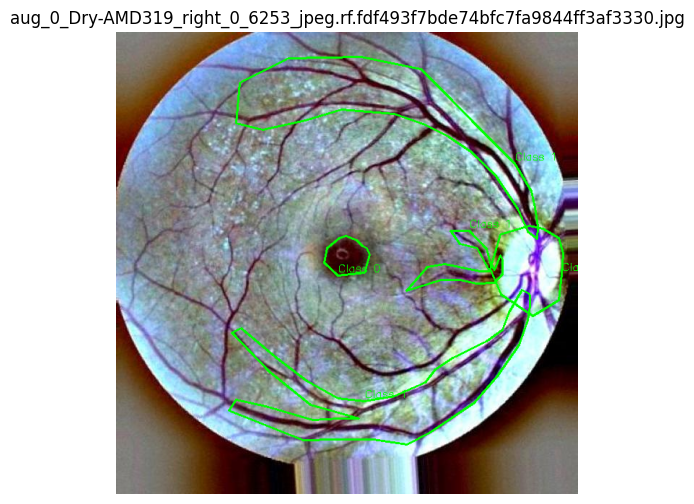

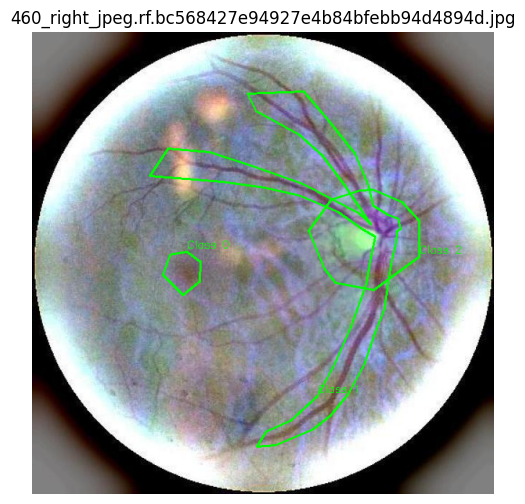

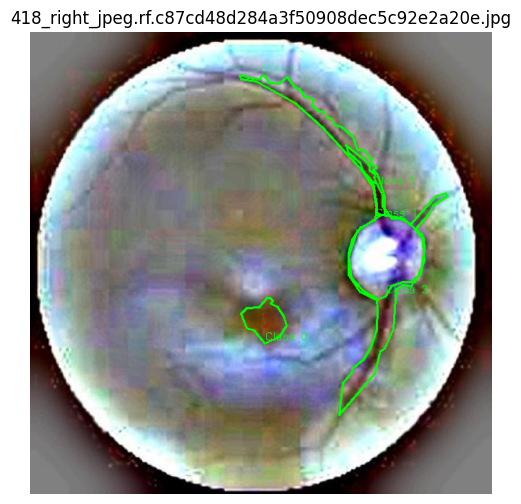

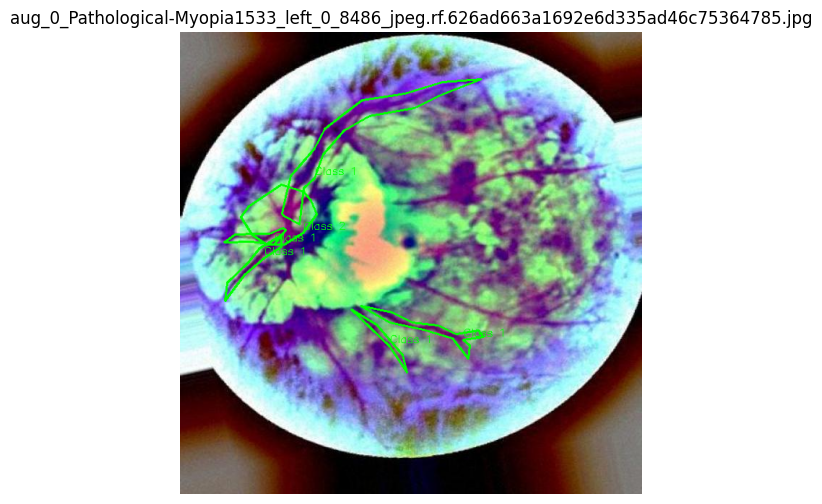

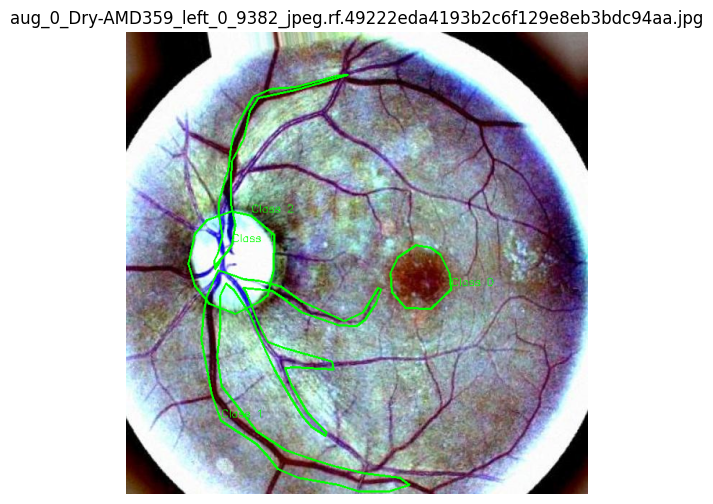

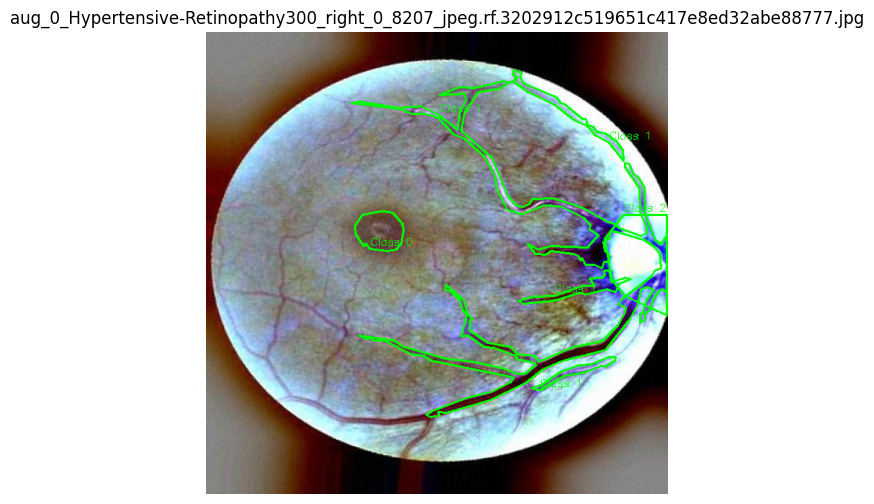

In [9]:

from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from ultralytics.utils.plotting import Annotator

# Adjust to your dataset paths
val_dir = Path('/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/valid/images')
label_dir = Path('/content/drive/MyDrive/RetinaVision_YOLOv12/yolov12/dl-project-1/data/dl-project-1.v2i.yolov12/valid/labels')

# Randomly sample validation images
files = list(val_dir.glob('*.jpg'))
sample = random.sample(files, 6)

for f in sample:
    img = cv2.imread(str(f))
    h, w = img.shape[:2]

    label_file = label_dir / (f.stem + '.txt')
    if label_file.exists():
        with open(label_file, 'r') as lf:
            for line in lf:
                parts = line.strip().split()
                cls = int(parts[0])
                poly = np.array(parts[1:], dtype=float).reshape(-1, 2)
                poly[:, 0] *= w
                poly[:, 1] *= h
                poly = poly.astype(np.int32)

                color = (0, 255, 0)
                cv2.polylines(img, [poly], isClosed=True, color=color, thickness=2)
                cv2.putText(img, f"Class {cls}", (poly[0][0], poly[0][1]-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f.name)
    plt.show()

## Section 4.2: Performance Metrics

[Report performance metrics (mAP, IoU, precision, recall)]

## Section 4.3: Model Checkpoints

[Save and document model checkpoints]

# Section 5: Model Testing (Unseen Data)

[Explain your train/val/test split strategy. ]

## Section 5.1: Performance Metrics on Test set

[Report final metrics on this held-out test set (e.g., mAP@.5:.95, IoU,
precision/recall per class),]

## Section 5.2: Example of Dectections and Segmentations

[ present visual examples of detections/segmentations. Discuss
generalization, failure cases, and how results differ from validation.]

# Section 6: Web Deployment

[About the deployment]

## 6.1: Streamlit Guide

In [ ]:
# insert

### 6.1.1: User Uploded Image and Run Interface

In [ ]:
# insert

### 6.1.2: Display Detection and Segmentation Results

In [ ]:
# insert

# Section 7: Results and Analysis

[Overall Performance]

## Section 7.1: Quantative Results and Analysis

[metrics - Discuss strengths, weaknesses, and edge cases.]

In [ ]:
#insert

## Section 7.2: Qualitative Results and Analysis

[visual examples - Discuss strengths, weaknesses, and edge cases.]

In [ ]:
#insert

# Section 8 Documentation

[IEEE Paper]

## Section 8.1: Abstract

## Section 8.2: Introduction

## Section 8.3: Methodology
[dataset, model, training, deployment]

## Section 8.4: Results and Discussion

## Section 8.5: Conclusion and Future Work

## Section 8.6: References
[IEEE style]

# Section 9: Insights and conclusion

[Summarize what your group learned about building an computer vision system. Discuss the
strengths and limitations and suggest areas for future improvement.]

# Section 10: References

[Cite relevant references that you used in your project. All references must be cited, including:]

## Section 10.1: Scholarly Articles
[Cite in APA format, and put a description of how you used it for your work.]

## Section 10.2: Online References
[Put the website, blog, or article title, link, and how you incorporated it into your
work]

## Section 10.3: Artifical Intelligence Tools
[Put the model used (e.g., ChatGPT, Gemini), the complete transcript of your
conversations with the model (including your prompts and its responses), and a
description of how you used it for your work.]